https://thecleverprogrammer.com/2021/01/05/bitcoin-price-prediction-with-python/

https://thecleverprogrammer.com/2020/12/14/facebook-prophet-model-with-python/

In [5]:
import pandas as pd
from fbprophet import Prophet
#import prophet


In [6]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
1,2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215
2,2022-02-06,41441.121094,42500.785156,41244.906250,42412.433594,42412.433594,16142097334
3,2022-02-07,42406.781250,44401.863281,41748.156250,43840.285156,43840.285156,28641855926
4,2022-02-08,43854.652344,45293.867188,42807.835938,44118.445313,44118.445313,33079398868


In [7]:
df = df[["Date", "Close"]]
df

,Date,Close
0,2022-02-04,41500.875000
1,2022-02-05,41441.164063
2,2022-02-06,42412.433594
3,2022-02-07,43840.285156
4,2022-02-08,44118.445313
...,...,...
361,2023-01-31,23139.283203
362,2023-02-01,23723.769531
363,2023-02-02,23471.871094
364,2023-02-03,23449.322266


In [8]:
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2022-02-04  41500.875000
1    2022-02-05  41441.164063
2    2022-02-06  42412.433594
3    2022-02-07  43840.285156
4    2022-02-08  44118.445313
..          ...           ...
361  2023-01-31  23139.283203
362  2023-02-01  23723.769531
363  2023-02-02  23471.871094
364  2023-02-03  23449.322266
365  2023-02-04  23448.958984

[366 rows x 2 columns]


In [9]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\TOSHIBA\anaconda3\envs\BitcoinPricePredictwithProphet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


 make predictions for the next 365 days

In [11]:
future = prophet.make_future_dataframe(periods = 365)
print(future)

            ds
0   2022-02-04
1   2022-02-05
2   2022-02-06
3   2022-02-07
4   2022-02-08
..         ...
726 2024-01-31
727 2024-02-01
728 2024-02-02
729 2024-02-03
730 2024-02-04

[731 rows x 1 columns]


In [12]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

c:\Users\TOSHIBA\anaconda3\envs\BitcoinPricePredictwithProphet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\TOSHIBA\anaconda3\envs\BitcoinPricePredictwithProphet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
531,2023-07-20,28432.810215,15677.804040,41131.378641
532,2023-07-21,28376.952422,15716.058626,41621.088995
533,2023-07-22,28457.317908,14989.007402,42127.180561
534,2023-07-23,28432.174375,15554.619784,42149.367006
535,2023-07-24,28561.695209,15366.801781,41645.086659
...,...,...,...,...
726,2024-01-31,37472.180421,-5479.664044,80838.273472
727,2024-02-01,37442.621904,-5628.649245,80765.833546
728,2024-02-02,37386.764111,-5766.870585,81285.484998
729,2024-02-03,37467.129598,-5442.808908,80974.799994


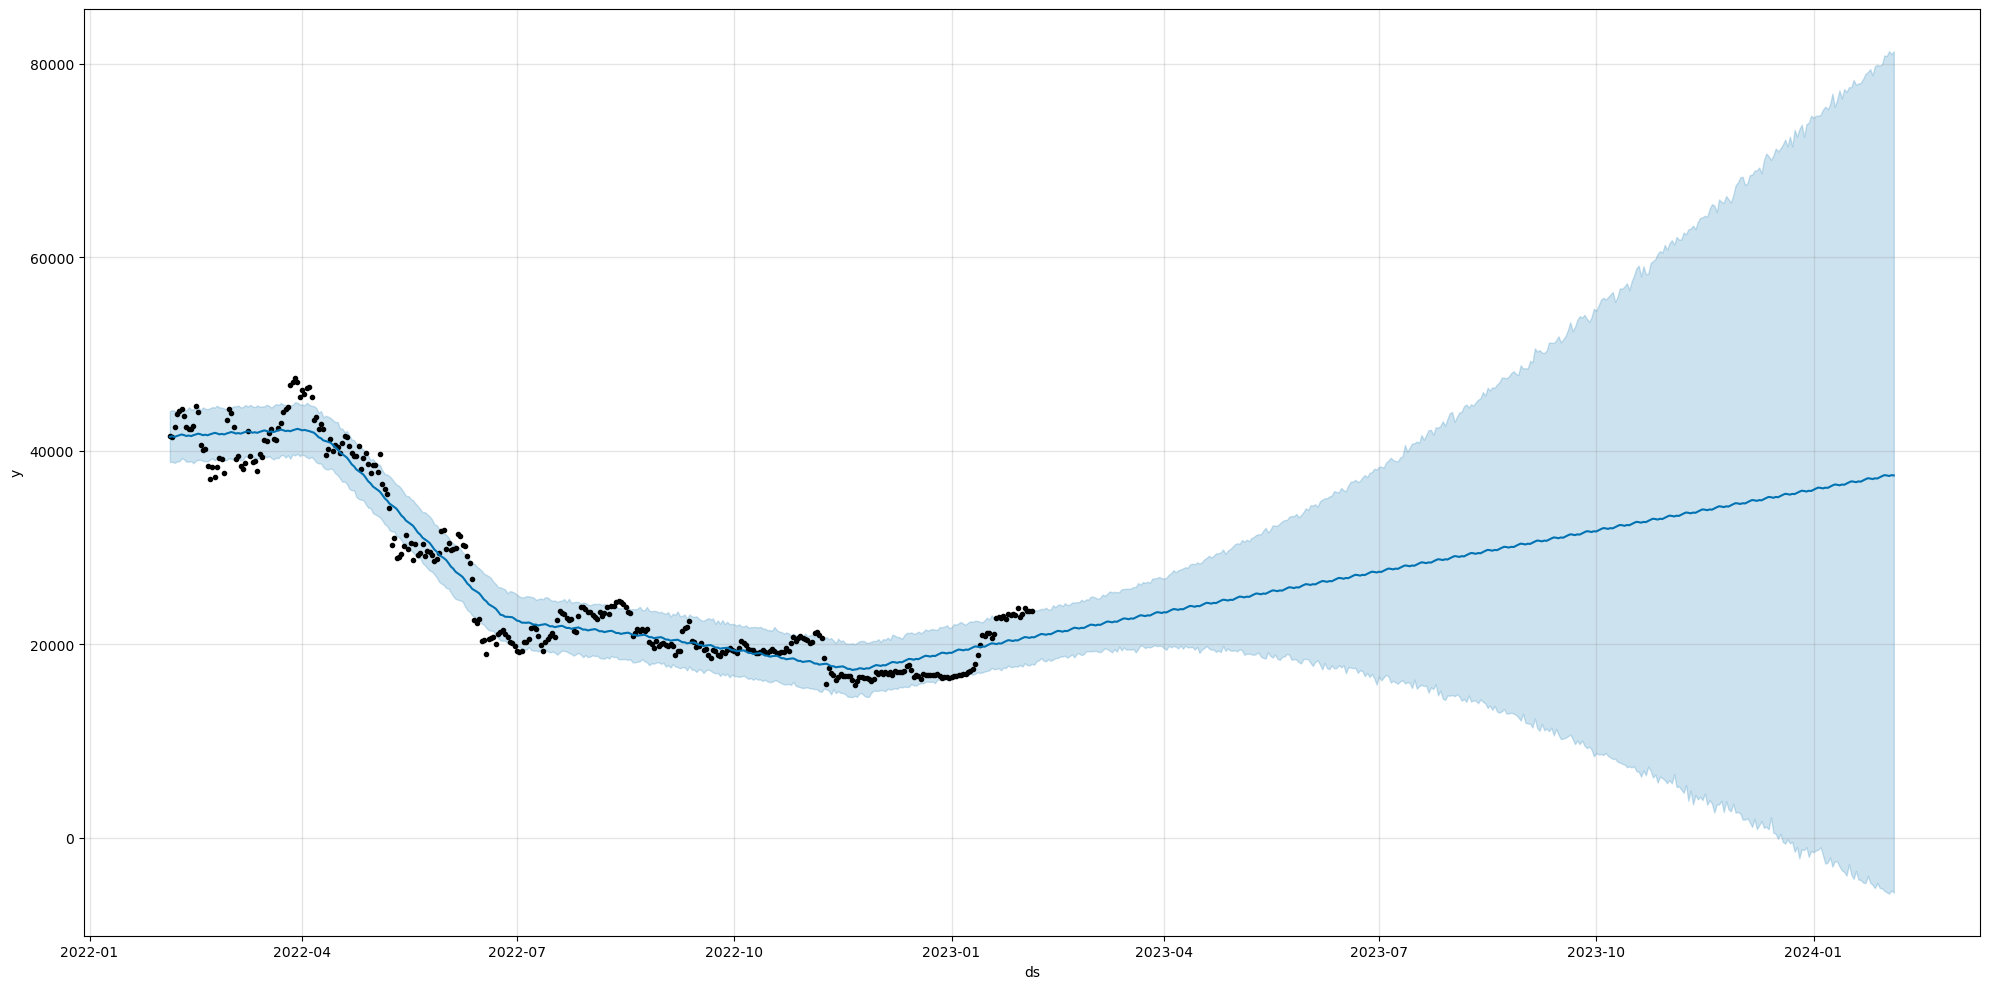

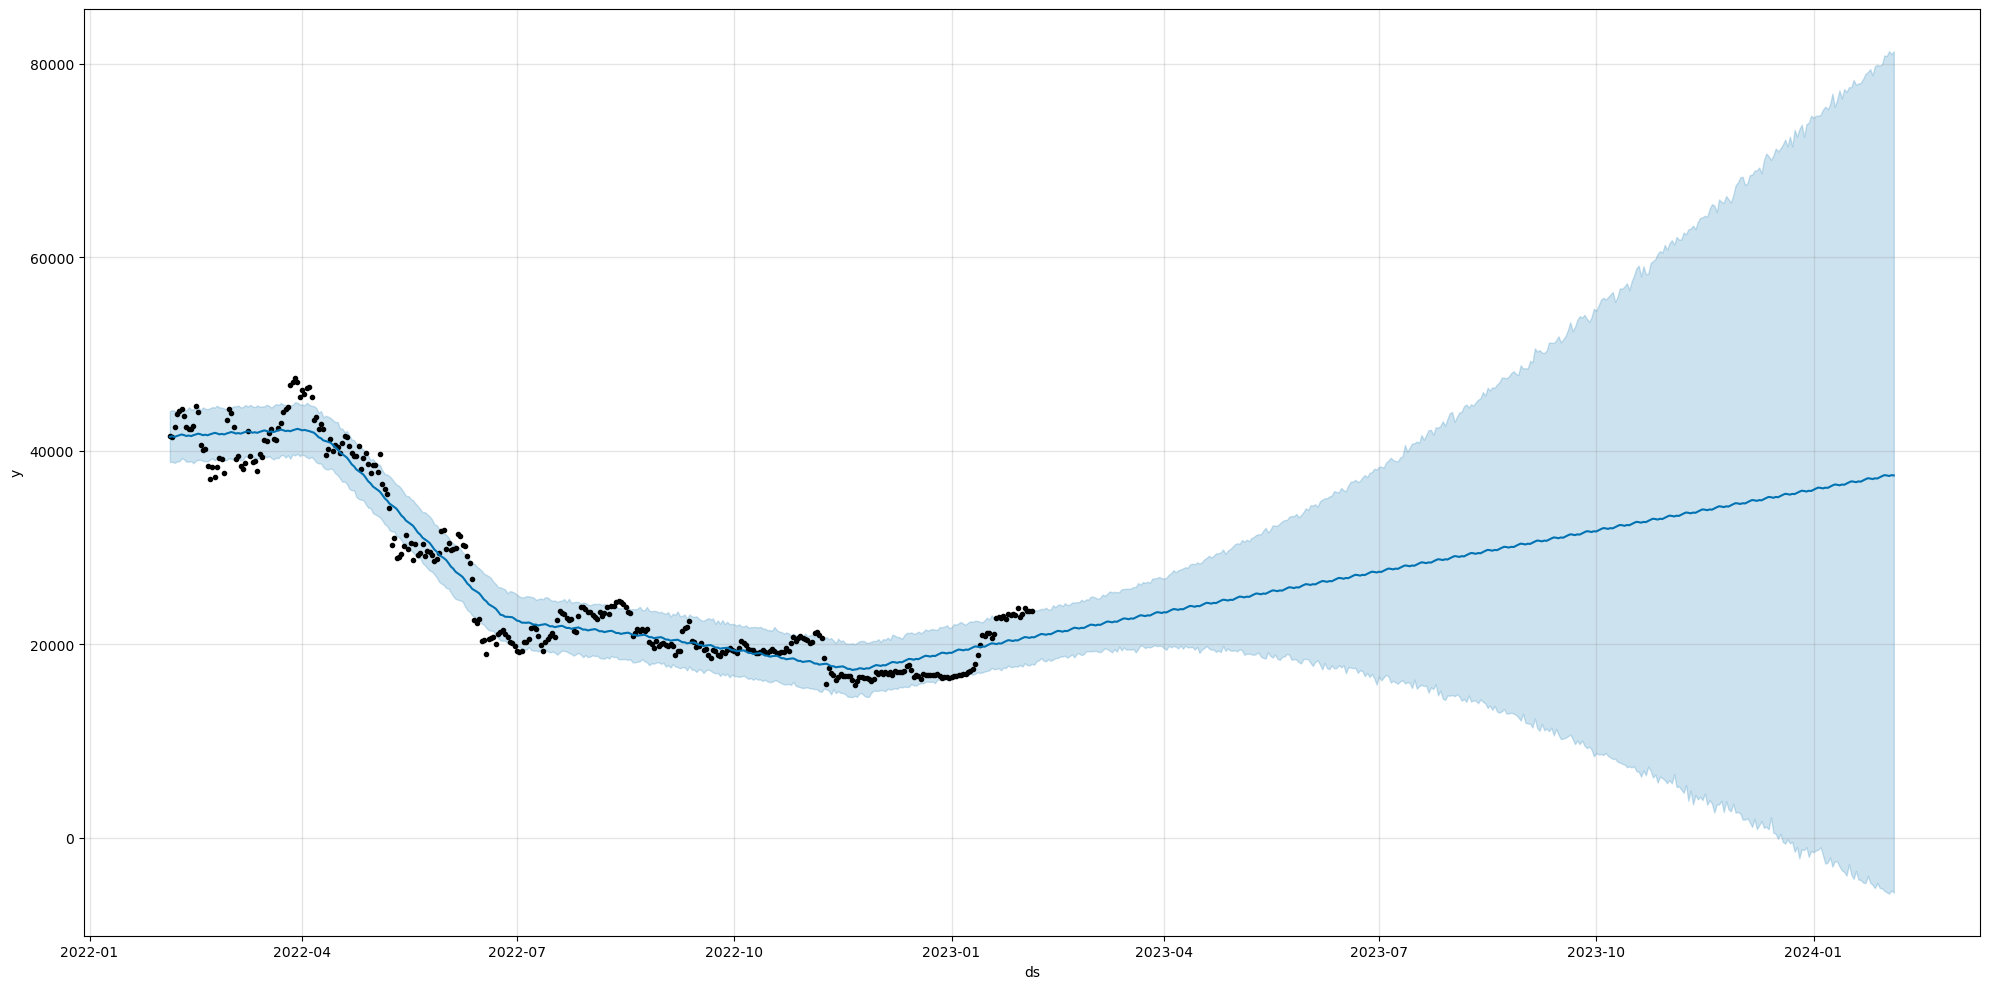

In [13]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize = (20,10))